<a href="https://colab.research.google.com/github/DurantZhou/ISYS5002-2024-S1-A2/blob/main/Tue_11AM_Group_2_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sqlite3
connection = sqlite3.connect('AUS_energy_sqlite3.db')
cursor = connection.cursor()

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
sql = '''
SELECT name FROM sqlite_master WHERE type = 'table';
'''
cursor.execute(sql)
cursor.fetchall()

[('AUS_energy',)]

In [5]:
sql = '''
PRAGMA table_info('AUS_energy');
'''
cursor.execute(sql)
cursor.fetchall()

[(0, 'Year', 'TEXT', 0, None, 0),
 (1, 'State', 'TEXT', 0, None, 0),
 (2, 'Coal (PJ)', 'REAL', 0, None, 0),
 (3, 'Oil (PJ)', 'REAL', 0, None, 0),
 (4, 'Gas (PJ)', 'REAL', 0, None, 0),
 (5, 'Renewables (PJ)', 'REAL', 0, None, 0),
 (6, 'Population', 'INTEGER', 0, None, 0),
 (7, 'GSP ($ million)', 'INTEGER', 0, None, 0)]

In [6]:
import pandas as pd
sql = '''
SELECT * FROM AUS_energy;
'''
#Load the data into a DataFrame
AUS_energy_df = pd.read_sql_query(sql,connection)

In [11]:
AUS_energy_df.head()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174


In [7]:
AUS_energy_df.tail()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701
97,2021-22,NT,,37.6,110.6,1.6,250219,26058


In [8]:
AUS_energy_df

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
...,...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701


In [9]:
# Check general information about the dataframe
AUS_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        98 non-null     object 
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


In [10]:
AUS_energy_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Length: 98, dtype: bool

In [11]:
# Check for missing values
AUS_energy_df.isnull().head()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [12]:
AUS_energy_df.notnull()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
93,True,True,True,True,True,True,True,True
94,True,True,True,True,True,True,True,True
95,True,True,True,True,True,True,True,True
96,True,True,True,True,True,True,True,True


In [13]:
# Check for missing values in each row
null_records = AUS_energy_df.isnull().any(axis = 1)

AUS_energy_df[null_records]

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)


In [14]:
# We need to know how many states the table includes
connection = sqlite3.connect('AUS_energy_sqlite3.db')
cursor = connection.cursor()

sql_query = '''
SELECT DISTINCT State
FROM AUS_energy;
'''
cursor.execute(sql_query)
results = cursor.fetchall()
states = [result[0] for result in results]
print(states)

['WA', 'NSW', 'VIC', 'QLD', 'SA', 'TAS', 'NT']


In [15]:
# We found that the data type of Coal(PJ) is object which should be changed to float64.
# To do that, we also need to ensure that there is no empty strings in the rowws
import pandas as pd
import numpy as np

# Replace empty strings with NaN
AUS_energy_df['Coal (PJ)'] = AUS_energy_df['Coal (PJ)'].replace('', np.nan)

# Convert the column to float
AUS_energy_df['Coal (PJ)'] = AUS_energy_df['Coal (PJ)'].astype(float)



# 打印 DataFrame，检查数据类型是否已经修改
print(AUS_energy_df.dtypes)


Year                object
State               object
Coal (PJ)          float64
Oil (PJ)           float64
Gas (PJ)           float64
Renewables (PJ)    float64
Population           int64
GSP ($ million)      int64
dtype: object


In [16]:
import pandas as pd

df= AUS_energy_df

# Filter the DataFrame to select rows where the State is 'WA'
wa_energy_data = df[df['State'] == 'WA']

# Calculate the total energy consumption for WA
coal_total = wa_energy_data['Coal (PJ)'].sum()
oil_total = wa_energy_data['Oil (PJ)'].sum()
gas_total = wa_energy_data['Gas (PJ)'].sum()
renewables_total = wa_energy_data['Renewables (PJ)'].sum()
total_energy_consumption = coal_total + oil_total + gas_total + renewables_total

# Print the total energy consumption for WA
print("Total energy consumption of WA:", total_energy_consumption)
print("Coal (PJ):", coal_total)
print("Oil (PJ):", oil_total)
print("Gas (PJ):", gas_total)
print("Renewables (PJ):", renewables_total)


Total energy consumption of WA: 15457.0
Coal (PJ): 1807.8
Oil (PJ): 5276.3
Gas (PJ): 8043.2
Renewables (PJ): 329.7


In [24]:
import pandas as pd
df= AUS_energy_df
# Create a list of all states
states = ['WA', 'NSW', 'VIC', 'QLD', 'SA', 'TAS', 'NT']
# Create a dictionnary to store energy consumption for each states
total_energy_consumption_by_state = {}
# Use for function to iterate states to calculate total energy consumption
for state in states:
  state_data = df[df['State'] == state]
  total_energy_consumption = state_data[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum().sum()
  total_energy_consumption = round(total_energy_consumption, 3)
  total_energy_consumption_by_state[state]= total_energy_consumption
print("Total energy consumption for each state:")
for state, total_energy_consumption in total_energy_consumption_by_state.items():
    print(f"{state}: {total_energy_consumption}")


Total energy consumption for each state:
WA: 15457.0
NSW: 21199.0
VIC: 19061.5
QLD: 19979.2
SA: 4507.4
TAS: 1475.0
NT: 1502.3


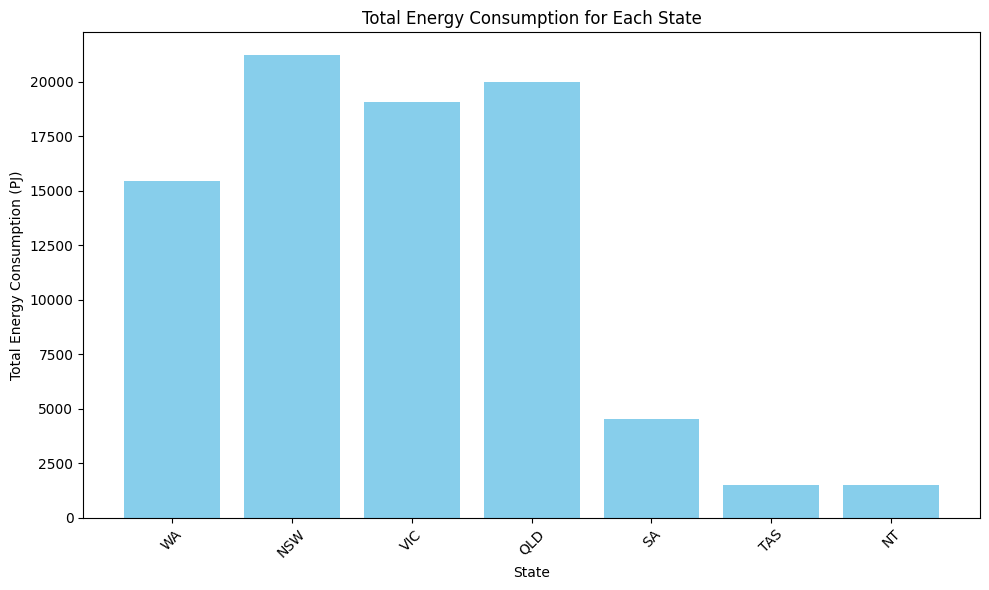

In [27]:
import matplotlib.pyplot as plt

# 提取州名和总能源消耗量
states = list(total_energy_consumption_by_state.keys())
total_consumption = list(total_energy_consumption_by_state.values())

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(states, total_consumption, color='skyblue')

# 添加标题和标签
plt.title('Total Energy Consumption for Each State')
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')

# 显示柱状图
plt.xticks(rotation=45)  # 旋转 x 轴标签
plt.tight_layout()  # 自动调整布局，以防止标签重叠
plt.show()
